## POLITIFACT

### GNNCL

Test set results:
- acc: 0.7240
- f1_macro: 0.7094
- f1_micro: 0.7240
- precision: 0.6710
- recall: 0.9016
- auc: 0.8543
- ap: 0.8589

### Original GCNFN

Test set results:
- acc: 0.8824
- f1_macro: 0.8798
- f1_micro: 0.8824
- precision: 0.8677
- recall: 0.9203
- auc: 0.9291
- ap: 0.9393

### UPFD-GCNFN

Test set results:
- acc: 0.8235
- f1_macro: 0.8224
- f1_micro: 0.8235
- precision: 0.8685
- recall: 0.7680
- auc: 0.8935
- ap: 0.8896

### UPFD-BiGCN

Test set results:
- acc: 0.8371
- f1_macro: 0.8363
- f1_micro: 0.8371
- precision: 0.8805
- recall: 0.7867
- auc: 0.8762
- ap: 0.8822

### UPFD-GCN

Test set results:
- acc: 0.8281
- f1_macro: 0.8275
- f1_micro: 0.8281
- precision: 0.8482
- recall: 0.8032
- auc: 0.8931
- ap: 0.9132

### UPFD-GAT

Test set results:
- acc: 0.8281
- f1_macro: 0.8269
- f1_micro: 0.8281
- precision: 0.8852
- recall: 0.7598
- auc: 0.8881
- ap: 0.8868

### UPFD-SAGE

Test set results:
- acc: 0.8281
- f1_macro: 0.8275
- f1_micro: 0.8281
- precision: 0.8564
- recall: 0.7960
- auc: 0.8901
- ap: 0.8867

## GOSSIPCOP

### GNNCL

Test set results:
- acc: 0.9349
- f1_macro: 0.9345
- f1_micro: 0.9349
- precision: 0.9074
- recall: 0.9694
- auc: 0.9693
- ap: 0.9494

### Original GCNFN

Test set results:
- acc: 0.9302
- f1_macro: 0.9296
- f1_micro: 0.9302
- precision: 0.8883
- recall: 0.9860
- auc: 0.9893
- ap: 0.9901

### UPFD-GCNFN

Test set results:
- acc: 0.9519
- f1_macro: 0.9517
- f1_micro: 0.9519
- precision: 0.9702
- recall: 0.9326
- auc: 0.9878
- ap: 0.9883

### UPFD-BiGCN

Test set results:
- acc: 0.9109
- f1_macro: 0.9104
- f1_micro: 0.9109
- precision: 0.9168
- recall: 0.9051
- auc: 0.9676
- ap: 0.9663

### UPFD-GCN

Test set results:
- acc: 0.9339
- f1_macro: 0.9334
- f1_micro: 0.9339
- precision: 0.9755
- recall: 0.8896
- auc: 0.9846
- ap: 0.9846

### UPFD-GAT

Test set results:
- acc: 0.9603
- f1_macro: 0.9601
- f1_micro: 0.9603
- precision: 0.9437
- recall: 0.9796
- auc: 0.9926
- ap: 0.9926

### UPFD-SAGE

Test set results:
- acc: 0.9765
- f1_macro: 0.9764
- f1_micro: 0.9765
- precision: 0.9712
- recall: 0.9823
- auc: 0.9945
- ap: 0.9945

## Code to plot a graph

In [1]:
from torch.utils.data import random_split
from torch_geometric.data import DataLoader, DataListLoader

from utils.data_loader import *

In [13]:
sample_id = 1
dataset = FNNDataset(root='data', feature='content', empty=False, name='politifact', transform=ToUndirected())
dataset[sample_id]

Data(edge_index=[2, 61], x=[21, 310], y=[1])

In [11]:
!pip install networkx
import networkx as nx

# From PyG utils
def to_networkx(data, node_attrs=None, edge_attrs=None, to_undirected=False,
                remove_self_loops=True):
    if to_undirected:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
    G.add_nodes_from(range(data.num_nodes))
    node_attrs, edge_attrs = node_attrs or [], edge_attrs or []
    values = {}
    for key, item in data(*(node_attrs + edge_attrs)):
        if torch.is_tensor(item):
            values[key] = item.squeeze().tolist()
        else:
            values[key] = item
        if isinstance(values[key], (list, tuple)) and len(values[key]) == 1:
            values[key] = item[0]
    for i, (u, v) in enumerate(data.edge_index.t().tolist()):
        if to_undirected and v > u:
            continue
        if remove_self_loops and u == v:
            continue
        G.add_edge(u, v)
        for key in edge_attrs:
            G[u][v][key] = values[key][i]
    for key in node_attrs:
        for i, feat_dict in G.nodes(data=True):
            feat_dict.update({key: values[key][i]})
    return G


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


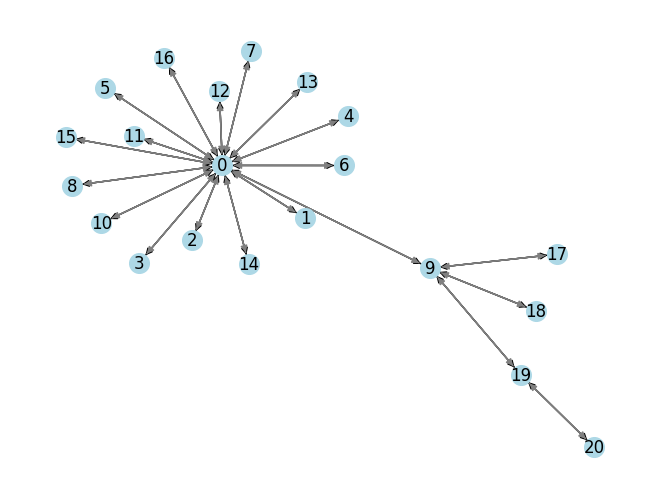

In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Después de convertir tus datos en un grafo NetworkX, puedes dibujarlo
G = to_networkx(dataset[sample_id])

# Configura el diseño del grafo (puedes elegir otro si prefieres)
pos = nx.spring_layout(G)

# Dibuja los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200)

# Dibuja las aristas
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Muestra el grafo
plt.show()